In [1]:
from dask.distributed import Client

client = Client()

In [2]:
import intake

url = "https://euro-cordex.s3.eu-central-1.amazonaws.com/catalog/CORDEX-CMIP5.json"
cat = intake.open_esm_datastore(url)

In [3]:
subset = cat.search(experiment_id="historical", model_id="REMO2015")
subset

,unique
project_id,1
product,1
CORDEX_domain,1
institute_id,1
driving_model_id,6
experiment_id,1
member,2
model_id,1
rcm_version_id,2
frequency,1


In [4]:
dsets = subset.to_dataset_dict(
    cdf_kwargs={"use_cftime": True},
    zarr_kwargs={"consolidated": True, "use_cftime": True},
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project_id.CORDEX_domain.institute_id.driving_model_id.experiment_id.member.model_id.rcm_version_id.frequency'


/var/folders/_8/qq584wg50hvdrcxg3k0wd9900000gn/T/ipykernel_46715/3659648660.py:1: DeprecationWarning: cdf_kwargs and zarr_kwargs are deprecated and will be removed in a future version. Please use xarray_open_kwargs instead.
  dsets = subset.to_dataset_dict(cdf_kwargs = {"use_cftime":True}, zarr_kwargs={'consolidated':True, 'use_cftime':True})


In [5]:
dsets.keys()

dict_keys(['cordex.EUR-11.GERICS.MPI-M-MPI-ESM-LR.historical.r3i1p1.REMO2015.v1.mon', 'cordex.EUR-11.GERICS.IPSL-IPSL-CM5A-LR.historical.r1i1p1.REMO2015.v1.mon', 'cordex.EUR-11.GERICS.IPSL-IPSL-CM5A-MR.historical.r1i1p1.REMO2015.v1.mon', 'cordex.EUR-11.GERICS.NCC-NorESM1-M.historical.r1i1p1.REMO2015.v1.mon', 'cordex.EUR-11.GERICS.CNRM-CERFACS-CNRM-CM5.historical.r1i1p1.REMO2015.v2.mon', 'cordex.EUR-11.GERICS.NOAA-GFDL-GFDL-ESM2G.historical.r1i1p1.REMO2015.v1.mon'])

['cordex.EUR-11.GERICS.CNRM-CERFACS-CNRM-CM5.historical.r1i1p1.REMO2015.v2.mon', 'cordex.EUR-11.GERICS.MPI-M-MPI-ESM-LR.historical.r3i1p1.REMO2015.v1.mon', 'cordex.EUR-11.GERICS.IPSL-IPSL-CM5A-LR.historical.r1i1p1.REMO2015.v1.mon', 'cordex.EUR-11.GERICS.IPSL-IPSL-CM5A-MR.historical.r1i1p1.REMO2015.v1.mon', 'cordex.EUR-11.GERICS.NCC-NorESM1-M.historical.r1i1p1.REMO2015.v1.mon', 'cordex.EUR-11.GERICS.NOAA-GFDL-GFDL-ESM2G.historical.r1i1p1.REMO2015.v1.mon']


In [38]:
mean = ensemble.tas.groupby("time.year").mean().mean(("rlon", "rlat"))

In [7]:
from dask.distributed import progress

In [12]:
means = [
    ds.tas.groupby("time.year").mean().mean(("rlon", "rlat")).compute()
    for ds in dsets.values()
]

In [14]:
import xarray as xr

dset = means
keys = list(dsets.keys())

ensemble = xr.concat(dset, dim=xr.DataArray(keys, dims="dset"))

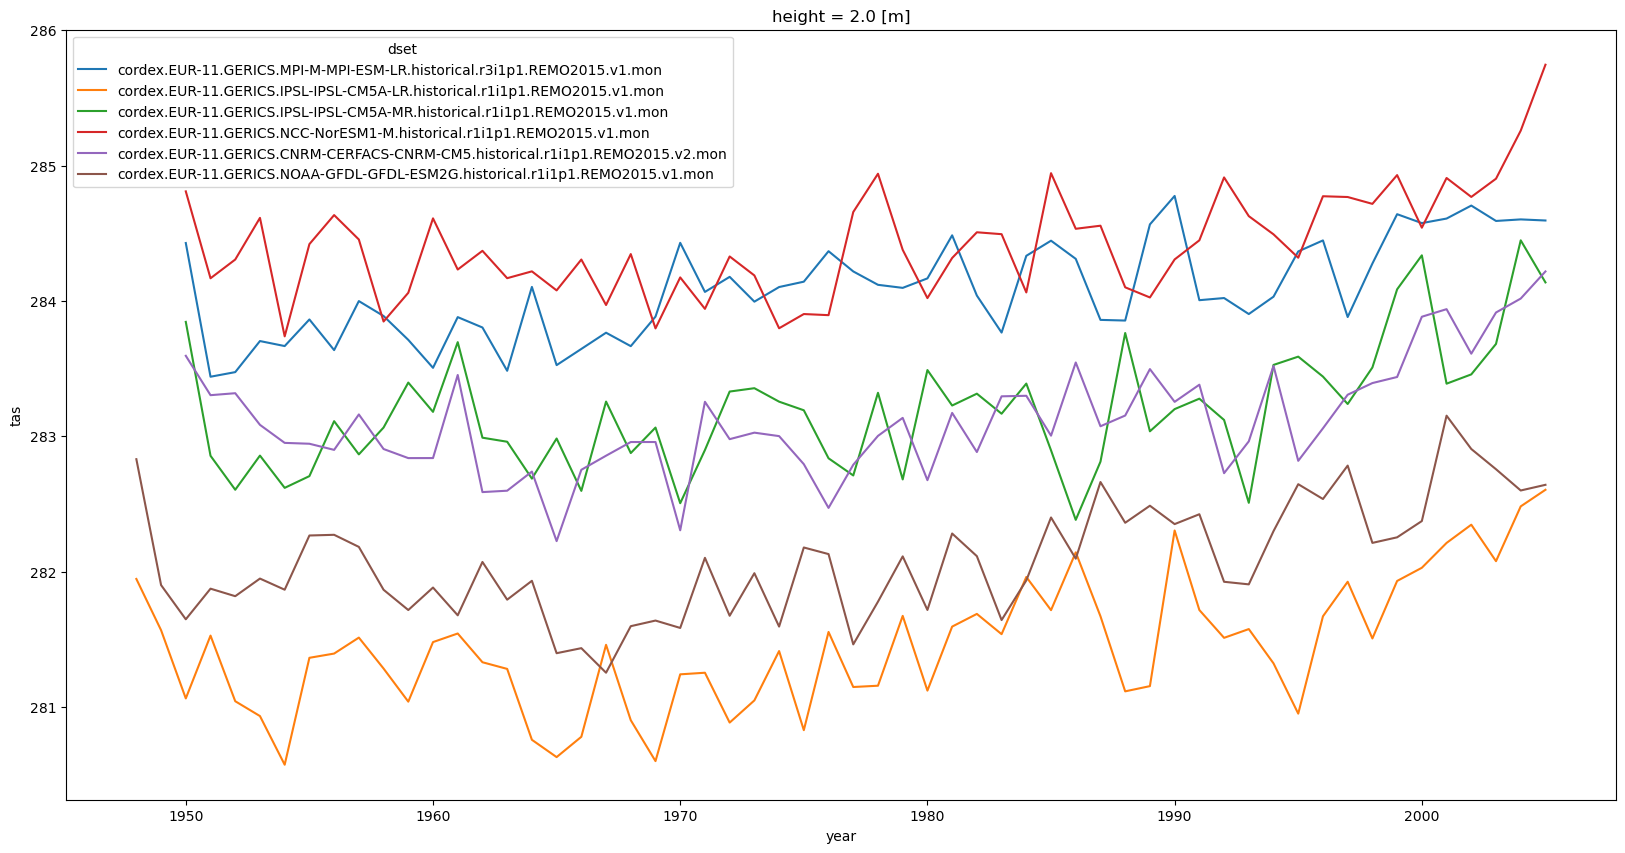

In [17]:
ensemble.plot(hue="dset", figsize=(20, 10))